In [1]:
!pip install opencv-python

In [2]:
!pip install opencv-contrib-python ## installing opencv 

In [3]:
import cv2  # importing opencv library

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
load_image=cv2.imread('/content/drive/My Drive/Images/crow.png')  # to read (or) load an image from disk

In [11]:
display_image=cv2.imshow('See yourself',load_image)  ## displays the image ,, but in colab thr is a prob with disply

DisabledFunctionError: ignored

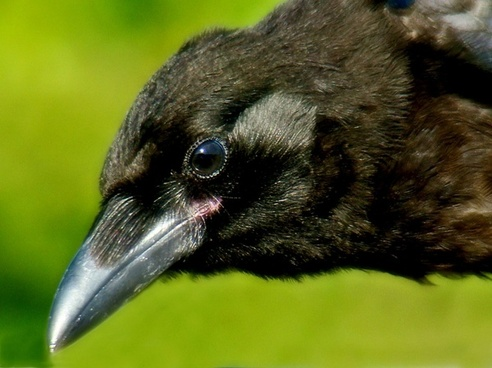

In [15]:
from google.colab.patches import cv2_imshow # this is a fix for above error which cant show..just use this function

show_image=cv2_imshow(load_image)  # show the image

cv2.waitKey(200) # tells us how much time to wait if we specify the number as arguments, i gave 200 millisecs

cv2.destroyAllWindows()  # destroys all the open popupof imgs

In [19]:
import numpy as np
shape=np.shape(load_image)  # displays height and width of image

In [20]:
shape[0]# to display height of image

368

In [21]:
shape[1]# to display width of image

492

In [29]:
pwd

'/content'

In [30]:
cd /content/drive/My Drive/Images

/content/drive/My Drive/Images


In [31]:
save=cv2.imwrite('image.png',load_image)  # 1st parameter saves the image to disk in the specified,
                                            # othr paramtr tells which one to save

In [ ]:
# as you can see that image is stored here on the disk

In [ ]:
## HAAR cascade classifiers used to chk all the features(edge features, rectngle feturs,othr features as well) ###

##simply identify features of humsn, objects, etc etc,,



In [ ]:
# How haar cascade classifier works??


# It is a machine learning based approach where a cascade function is trained from a lot of positive and negative images. 
# It is then used to detect objects in other images.

#Here we will work with face detection.


# Initially, the algorithm needs a lot of 
  # positive images (images of faces) and negative images (images without faces) to train the classifier.


#Then we need to extract features from it.
  
   #For this, Haar features shown in the below image are used.
     #They are just like our convolutional kernel
        #Each feature is a single value obtained by subtracting sum of pixels under the white rectangle 
        #from sum of pixels under the black rectangle.

        #Now, all possible sizes and locations of each kernel are used to calculate lots of features. 
        #(Just imagine how much computation it needs? Even a 24x24 window results over 160000 features). 

  #For each feature calculation, we need to find the sum of the pixels under white and black rectangles. 

     #To solve this, they introduced the integral image.

     # However large your image, it reduces the calculations for a given pixel to an operation involving just four pixels.
      #Nice, isn't it? It makes things super-fast.

  #But among all these features we calculated, most of them are irrelevant. 

    #For example, consider the image below. The top row shows two good features.

     # The first feature selected seems to focus on the property that the region of the eyes is often darker than the region of the nose and cheeks. 
       # The second feature selected relies on the property that the eyes are darker than the bridge of the nose.


  # But the same windows applied to cheeks or any other place is irrelevant. \
    #So how do we select the best features out of 160000+ features? It is achieved by Adaboost.

  # For this, we apply each and every feature on all the training images. 
        #For each feature, it finds the best threshold which will classify the faces to positive and negative.
            #Obviously, there will be errors or misclassifications. We select the features with minimum error rate, 
              #which means they are the features that most accurately classify the face and non-face images.

    
  #(The process is not as simple as this. Each image is given an equal weight in the beginning.
  # After each classification, weights of misclassified images are increased.
  # Then the same process is done. New error rates are calculated. 
  #Also new weights. 
  #The process is continued until the required accuracy or error rate is achieved or the required number of features are found).



###The final classifier is a weighted sum of these weak classifiers. 
  #It is called weak because it alone can't classify the image, but together with others forms a strong classifier. 
     #The paper says even 200 features provide detection with 95% accuracy.
     # Their final setup had around 6000 features. 
     #(Imagine a reduction from 160000+ features to 6000 features. That is a big gain).


  #So now you take an image. Take each 24x24 window. Apply 6000 features to it. Check if it is face or not.
      # Wow.. Isn't it a little inefficient and time consuming? 
      #Yes, it is. The authors have a good solution for that.

  ##In an image, most of the image is non-face region.
        # So it is a better idea to have a simple method to check if a window is not a face region. 
                #If it is not, discard it in a single shot, and don't process it again.
                    # Instead, focus on regions where there can be a face. 
                    #This way, we spend more time checking possible face regions.

#For this they introduced the concept of Cascade of Classifiers. 
    #nstead of applying all 6000 features on a window, 
        #the features are grouped into different stages of classifiers and applied one-by-one.

    #Normally the first few stages will contain very many fewer features).
    # If a window fails the first stage, discard it. We don't consider the remaining features on it.

  #If it passes, apply the second stage of features and continue the process. 
  #The window which passes all stages is a face region. How is that plan!

  #The authors' detector had 6000+ features with 38 stages with 1, 10, 25, 25 and 50 features in the first five stages. 
  #(The two features in the above image are actually obtained as the best two features from Adaboost).

  #According to the authors, on average 10 features out of 6000+ are evaluated per sub-window.



In [32]:
import numpy as np
import cv2

In [33]:
cd /content/drive/My Drive/Haar

/content/drive/My Drive/Haar


In [35]:
!git clone 'https://github.com/opencv/opencv.git'

Cloning into 'opencv'...
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 278092 (delta 0), reused 0 (delta 0), pack-reused 278090
Receiving objects: 100% (278092/278092), 471.75 MiB | 10.40 MiB/s, done.
Resolving deltas: 100% (194305/194305), done.
Checking out files: 100% (6503/6503), done.


In [36]:
# load the variable with the function which identifies the facial features 

faceclassifier=cv2.CascadeClassifier('/content/drive/My Drive/Haar/opencv/data/haarcascades/haarcascade_frontalface_default.xml')

In [37]:
##  Now read the image 

image=cv2.imread('/content/drive/My Drive/Images/Pic.jpg')

# convert image into grayscale for fast computation

image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [39]:
#    Face classifier runs that classifier onto our image and tries to fins featrs
#   now classfr returns roi for detected face as a tuple in the variable and stores coordnts

faces=faceclassifier.detectMultiScale(image_gray,1.3,5)

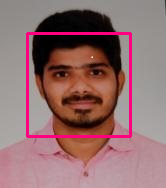

In [53]:
# when no faces are detected then simply return an empty tuple

if faces is ():
  print("No faces found")

# Now we iterate over all the regions of our face array and chk which one has faces

#detect mltiscale identoifies coordinates (or) 4 features (x,y,w,h) from faces and plot thm into rectangle#

for(x,y,w,h) in faces:
  cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),2)
  cv2_imshow(image)
  
  


In [ ]:
## detect eyes in image



In [54]:
eyeclassifier=cv2.CascadeClassifier('/content/drive/My Drive/Haar/opencv/data/haarcascades/haarcascade_eye.xml')

In [55]:
##  Now read the image 

image=cv2.imread('/content/drive/My Drive/Images/Pic.jpg')

# convert image into grayscale for fast computation

image_gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [56]:
eyes=eyeclassifier.detectMultiScale(image_gray,1.3,5)

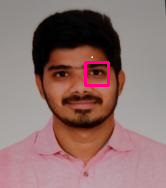

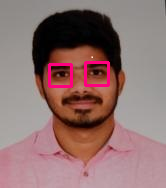

In [58]:
for(x,y,w,h) in eyes:
  cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),2)
  cv2_imshow(image)